# Quantified Self Project: Screen Time Data Tracking
## Isabella CdeBaca
### CPSC 222, Fall 2020

# Introduction
For this project I have decided to focus my data collection to the Technology Domain. I have been recorded my phone screen time over a two-month period. My screen_time data set was collected using the I Phone feature 'Screen Time' which seperated the time spent on my phone into the following categories: date, daily average, social, entertainment, productivity, creatvity, and other. Over the two months of data collecting I went through a couple of pretty significant life changes. As a result, I hypothesized that my screen time will have increased over the data collection period. Specifically, I predict that in addition to a rise in screen time, I will see in increase in my use of social media. For my classification I am trying to predict if I am more active on my phone during the weekdays versus the weekend.

# Data Analysis
## Dataset Description
For this project I used a screen_time dataset and a days_of_week dataset.

Both datasets are in .CSV format and have been included in my Github repo.

My screen_time data set was collected using the I Phone feature 'Screen Time' which allows me to access real time reports about how much time I am spending on my screen and what I am doing with those hours. Data is collected daily as is divided into the following categories:

* Date
    * This column provides the date.
* Daily Average
    * This is the number of hours total spent on the screen.
* Social
    * This row is categorized by hours spent on social media platforms such as Instagram, Snapchat, Tinder, Facebook, etc.
* Entertainment
    * This row is categorized by hours spent on entertianment platforms such as Spotify, YouTube, Hulu, Netflix, etc.
* Productivity
    * This row is categorized by hours spent on productivity platforms. I have set my productivity settings to measure how much time I spend on emails, phone calls, banking apps, etc.
* Creativity
    * This row is categorized by hours spent on productivity platforms. I have set my creativity settings to measure how much time I spend on apps such as editors and e-reading platforms that utalzie my brain more than the apps listed in the social/entertianment sections.
* Other
    * This row is categorized by hours spent on my phone doing activities that did not fit into the above categories.
* Day of Week
    * This column provides the day of the week on which the date fell.

## Dataset Analysis
### This portion is divided into two sections: dataset visualizations are up top and hypothesis testing is below.
For the dataset visualization portion of the project, I have devised serval graphs to visualize my screen time data:
* Data Description
* Category Average
* Daily Average
* Interest Over Time
    * More information about each category is provided below

### Data Description
* This category provides a description of the data as a whole.

In [75]:
import pandas as pd
import numpy as np

#load the dataframe
cleaned_df= pd.read_csv("cleaned_data.csv")
#print(cleaned_df)

#describing the data
print("Describing the Data:\n", df.describe())

#convert date feature to be numeric
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()
#date
cleaned_df['Date']= label_encoder.fit_transform(cleaned_df['Date'])
cleaned_df['Date'].unique()
#weekday
cleaned_df['Weekday']= label_encoder.fit_transform(cleaned_df['Weekday'])
cleaned_df['Weekday'].unique()

Describing the Data:
        Daily Average     Social  Entertainment   Productivity   Creativity  \
count      62.000000  62.000000       62.000000      62.000000   62.000000   
mean        8.080645   4.032258        1.500000       1.322581    0.467742   
std         4.747038   2.757807        1.376024       1.315409    0.717869   
min         0.000000   0.000000        0.000000       0.000000    0.000000   
25%         4.250000   1.250000        0.000000       0.000000    0.000000   
50%         8.000000   4.000000        1.000000       1.000000    0.000000   
75%        12.000000   7.000000        2.000000       2.000000    1.000000   
max        16.000000  10.000000        5.000000       5.000000    3.000000   

           Other  
count  62.000000  
mean    0.741935  
std     0.904189  
min     0.000000  
25%     0.000000  
50%     1.000000  
75%     1.000000  
max     4.000000  


array([5, 6, 4, 0, 2, 3, 1])

### Category Average
* This pie chart shows the percetage of time I spent in each of the categories. 

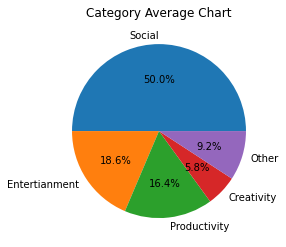

In [22]:
#Visualizations
import matplotlib.pyplot as plt

#pie chart of category averages
pie_mean= [4.032258,1.500000,1.322581,0.46774,0.741935]
pie_labels= 'Social','Entertianment','Productivity','Creativity','Other'
plt.pie(pie_mean,labels= pie_labels,autopct='%1.1f%%')
plt.title('Category Average Chart')
plt.show()

### Daily Average
* This scatter chart shows my daily average over the data collection period.

m: -0.03220518244315177 b 8.966155473294553


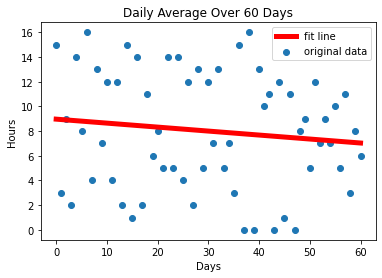

In [3]:
#scatter plot of usage over time
import numpy as np
import matplotlib.pyplot as plt 

x=[1, 23, 45, 50, 52, 54, 56, 58, 60,  3,  5,  7,  9, 11, 13, 15, 17,19, 21, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 47,  0, 22, 44, 49,51, 53, 55, 57, 59,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 46, 48]
y=[3,5,1,5,7,7,5,3,6,2,8,4,7,4,2,1,2,6,5,4,2,5,7,5,3,0,0,10,0,0,15,14,12,9,12,9,10,11,8,9,14,16,13,12,12,15,14,11,8,14,12,13,12,13,7,15,16,13,11,11,8]

mean_x= np.mean(x)
mean_y= np.mean(y)
num_prods=[]
den_squares=[]

for i in range(len(x)):
    num_prods.append((x[i]-mean_x)*(y[i]-mean_y))
    den_squares.append((x[i]-mean_x)**2)
    
m= sum(num_prods) / sum(den_squares)
b= mean_y - m * mean_x
print("m:",m,"b",b)

plt.figure()
plt.scatter(x,y, label="original data")
plt.plot([min(x), max(x)], [m*min(x)+b, m*max(x)+b], label="fit line", color="red", lw=5)
plt.legend()
plt.title("Daily Average Over 60 Days")
plt.xlabel("Days")
plt.ylabel("Hours")
plt.show()


### Interest Over Time
* For these graphs I have visualized each of the categories and how my interest in each category changed over the data collection period.
    * Each graphs color corresponds to the colors seen in the 'category average' pie chart above.

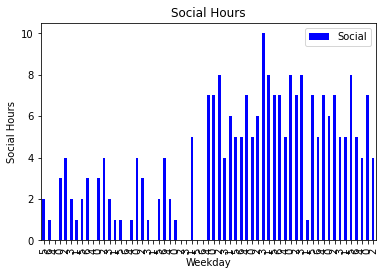

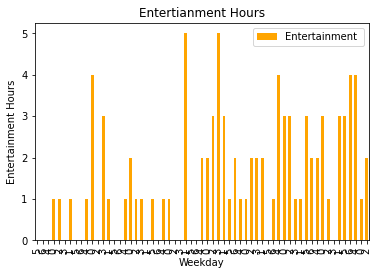

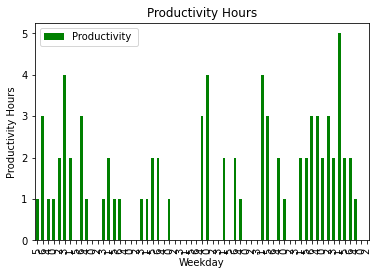

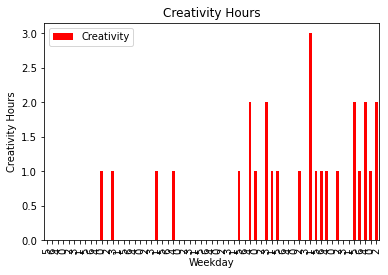

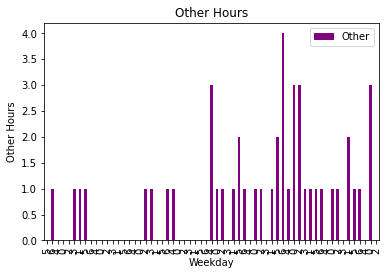

In [76]:
#bar chart (social vs. weekday)
cleaned_df.plot.bar(x='Weekday', y="Social", color="blue")
plt.title("Social Hours")
plt.xlabel("Weekday")
plt.ylabel("Social Hours")
plt.show()
#bar chart (entertianment vs. weekday)
cleaned_df.plot.bar(x='Weekday', y='Entertainment ', color="orange")
plt.title("Entertianment Hours")
plt.xlabel("Weekday")
plt.ylabel("Entertainment Hours")
plt.show()
#bar chart (productivity vs. weekday)
cleaned_df.plot.bar(x='Weekday', y="Productivity ", color="green")
plt.title("Productivity Hours")
plt.xlabel("Weekday")
plt.ylabel("Productivity Hours")
plt.show()
#bar chart (creativity vs. weekday)
cleaned_df.plot.bar(x='Weekday', y="Creativity", color="red")
plt.title("Creativity Hours")
plt.xlabel("Weekday")
plt.ylabel("Creativity Hours")
plt.show()
#bar chart (other vs. weekday)
cleaned_df.plot.bar(x='Weekday', y="Other", color="purple")
plt.title("Other Hours")
plt.xlabel("Weekday")
plt.ylabel("Other Hours")
plt.show()

## Hypothesis Testing
* For the hypothesis testing portion of the project, I have decided to test the following hypotheses:
1. Is the average screen time in September greater than the screen time in October ?
2. Is the average social time in September greater than the social time in October ?
3. Is the average productivity time in September greater than the productivity time in October ?

**1. Is the average screen time in September greater than the screen time in October?**
* State null and alternative hypothesis
    * H0: $\mu \geq mean$
    * H1: $\mu \leq mean$
* State the level of significance
    * Level of significance of 0.01
* Select the appropriate test statistic
    * T-statistic for two-sample (independent) test of means: 
        * $t= \frac {\bar X1 - \bar X2}{\sqrt{Sp^2 (\frac{1}{n1} + \frac{1}{n2})}}$
    * Pooled Variance: 
        * $Sp^2= \frac{(n1-1)s1^2+(n2-1)s2^2}{n1+n2-2}$
* Formulate the decision rule
    * T_critical= ($df= 29, \alpha= 0.01$) **2.462**
    * T_computed= **-12.3**
        * Since t_computed is within t_critical range, we will reject the hypothesis.
* Make a decision
    * At the 0.01 level of significance, my screen time average **was not** greater in September than it was in October.
        * **My screen time average was higher in October than September.**

In [86]:
import scipy.stats as stats
exp = [3,5,1,5,7,7,5,3,6,2,8,4,7,4,2,1,2,6,5,4,2,5,7,5,3,0,0,10,0,0]
cont= [15,14,12,9,12,9,10,11,8,9,14,16,13,12,12,15,14,11,8,14,12,13,12,13,7,15,16,13,11,11]

Xbar_exp = np.mean(exp)
Xbar_cont = np.mean(cont)

n_exp = len(exp)
n_cont = len(cont)

s_exp = np.std(exp, ddof=1)
s_cont = np.std(cont, ddof=1)

pooled_var = ((n_exp - 1) * s_exp ** 2 + (n_cont - 1) * s_cont ** 2) \
/ (n_exp + n_cont - 2)

print("Xbar_exp:\n",Xbar_exp,"\nXbar_cont:\n",Xbar_cont,"\npooled variance:\n",pooled_var)

t_computed = (Xbar_exp - Xbar_cont) / np.sqrt(pooled_var * (1 / n_exp + 1 / n_cont))
print("t_computed:\n",t_computed)

t_computed, p_val = stats.ttest_ind(exp, cont)
print("p_value\n", p_val / 2)

Xbar_exp:
 3.966666666666667 
Xbar_cont:
 12.033333333333333 
pooled variance:
 6.447126436781608
t_computed:
 -12.304292510806057
p_value
 4.134011426478812e-18


**2. Is the average social time in September greater than the social time in October ?**
* State null and alternative hypothesis
    * H0: $\mu \geq mean$
    * H1: $\mu \leq mean$
* State the level of significance
    * Level of significance of 0.01
* Select the appropriate test statistic
    * T-statistic for two-sample (independent) test of means: 
        * $t= \frac {\bar X1 - \bar X2}{\sqrt{Sp^2 (\frac{1}{n1} + \frac{1}{n2})}}$
    * Pooled Variance: 
        * $Sp^2= \frac{(n1-1)s1^2+(n2-1)s2^2}{n1+n2-2}$
* Formulate the decision rule
    * T_critical= ($df= 29, \alpha= 0.01$) **2.462**
    * T_computed= **-10.6**
        * Since t_computed is within t_critical range, we will reject the hypothesis.
* Make a decision
    * At the 0.01 level of significance, my social time average **was not** greater in September than it was in October.
        * **My social time average was higher in October than September.**

In [87]:
exp = [2,1,0,3,4,2,1,2,3,0,3,4,2,1,1,0,1,4,3,1,0,2,4,2,1,0,0,5,0,0]
cont= [7,7,8,4,6,5,5,7,5,6,10,8,7,7,5,8,7,8,1,7,5,7,6,7,5,5,8,5,4,7,4]

Xbar_exp = np.mean(exp)
Xbar_cont = np.mean(cont)

n_exp = len(exp)
n_cont = len(cont)

s_exp = np.std(exp, ddof=1)
s_cont = np.std(cont, ddof=1)

pooled_var = ((n_exp - 1) * s_exp ** 2 + (n_cont - 1) * s_cont ** 2) \
/ (n_exp + n_cont - 2)

print("Xbar_exp:\n",Xbar_exp,"\nXbar_cont:\n",Xbar_cont,"\npooled variance:\n",pooled_var)

t_computed = (Xbar_exp - Xbar_cont) / np.sqrt(pooled_var * (1 / n_exp + 1 / n_cont))
print("t_computed:\n",t_computed)

t_computed, p_val = stats.ttest_ind(exp, cont)
print("p_value\n", p_val / 2)

Xbar_exp:
 1.7333333333333334 
Xbar_cont:
 6.161290322580645 
pooled variance:
 2.645088390741753
t_computed:
 -10.630650880717086
p_value
 1.2372682631152165e-15


**3. Is the average productivity time in September greater than the productivity time in October ?**
* State null and alternative hypothesis
    * H0: $\mu \geq mean$
    * H1: $\mu \leq mean$
* State the level of significance
    * Level of significance of 0.01
* Select the appropriate test statistic
    * T-statistic for two-sample (independent) test of means: 
        * $t= \frac {\bar X1 - \bar X2}{\sqrt{Sp^2 (\frac{1}{n1} + \frac{1}{n2})}}$
    * Pooled Variance: 
        * $Sp^2= \frac{(n1-1)s1^2+(n2-1)s2^2}{n1+n2-2}$
* Formulate the decision rule
    * T_critical= ($df= 29, \alpha= 0.01$) **2.462**
    * T_computed= **-1.76**
        * Since t_computed is not within t_critical range, we will not reject the hypothesis.
* Make a decision
    * At the 0.01 level of significance, my productivity time average **was** greater in September than it was in October.
        * **My productivity time average was higher in September than October.**

In [88]:
exp = [1,3,1,1,2,4,2,0,3,1,0,0,1,2,1,1,0,0,0,1,1,2,2,0,1,0,0,0,0,0]
cont= [3,4,0,0,2,0,2,1,0,0,0,4,3,0,2,1,0,0,2,2,3,3,2,3,2,5,2,2,1,0,0]

Xbar_exp = np.mean(exp)
Xbar_cont = np.mean(cont)

n_exp = len(exp)
n_cont = len(cont)

s_exp = np.std(exp, ddof=1)
s_cont = np.std(cont, ddof=1)

pooled_var = ((n_exp - 1) * s_exp ** 2 + (n_cont - 1) * s_cont ** 2) \
/ (n_exp + n_cont - 2)

print("Xbar_exp:\n",Xbar_exp,"\nXbar_cont:\n",Xbar_cont,"\npooled variance:\n",pooled_var)

t_computed = (Xbar_exp - Xbar_cont) / np.sqrt(pooled_var * (1 / n_exp + 1 / n_cont))
print("t_computed:\n",t_computed)

t_computed, p_val = stats.ttest_ind(exp, cont)
print("p_value\n", p_val / 2)

Xbar_exp:
 1.0 
Xbar_cont:
 1.5806451612903225 
pooled variance:
 1.6533624931656643
t_computed:
 -1.7632071056526193
p_value
 0.041521863201807084


# Classification Results
In order to test whether I am more active on my phone on the weekdays versus the weekend. I used the kNN classifier and decision tree classifier to get predicted values for each of my categories. The last day I collected data was on a Saturday. Therefore, the sixteen predicted values correspond to the following days: _Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday, Monday._ From there, I added the weekday values and the weekend values to determine wheather my classifier predicted more weekday, or weekend hours.

I have organized each of my classifications by category (social, entertainment, productivity, creativity, and other). Each section provides further information about the predictive ability and performance of each category.

Overall, no category had accuracy over 56%. However, each test predicted that I spend more time on my phone during the weekdays versus the weekend. Despite the low accuracy, I feel that my classifiers preformed well. My exploratory data and statistical analysis shows an increase in my screen time hours overall. Given that there are more weekdays versus weekend days, it is safe to say than an overall increase in screen time would result in my being more active on my phone during the weekdays since there is no distict pattern in my increased screen time.

### Social
* **kNN classifier-**
Sunday: 1,
Monday: 2,
Tuesday: 4,
Wednesday: 0,
Thursday: 0,
Friday: 0,
Saturday: 1,
Sunday: 5,
Monday: 2,
Tuesday: 0,
Wednesday: 1,
Thursday: 2,
Friday: 7,
Saturday: 7,
Sunday: 4,
Monday: 7
    * Accuracy: **37%**
    * Weekday Hours: 25
    * Weekend Hours: 18
* **DecisionTreeClassifier-**
Sunday: 0,
Monday: 7,
Tuesday: 5,
Wednesday: 0,
Thursday: 3, 
Friday: 0,
Saturday: 6,
Sunday: 7,
Monday: 7,
Tuesday: 1,
Wednesday: 1,
Thursday: 5,
Friday: 5,
Saturday: 8,
Sunday: 5,
Monday: 5,
    * Accuracy: **37%**
    * Weekday Hours: 39
    * Weekend Hours: 26

In [58]:
#Testing/Evaluation of kNN classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn import tree

y= cleaned_df["Social"]
X= cleaned_df.drop("Social", axis=1)

scaler= MinMaxScaler()
X= scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train:\n",X_train)
print("y_train:\n",y_train)
print("X_test:\n",X_test)
print("y_test:\n",y_test)

X_train:
 [[0.4        0.875      0.6        0.4        0.33333333 0.25
  0.83333333]
 [0.96666667 0.1875     0.         0.         0.         0.25
  0.83333333]
 [0.21666667 0.125      0.         0.2        0.         0.
  0.83333333]
 [0.73333333 0.75       0.6        0.         0.         0.25
  0.33333333]
 [0.46666667 0.8125     0.4        0.6        0.33333333 0.
  0.66666667]
 [0.78333333 0.         0.         0.         0.         0.
  1.        ]
 [0.13333333 0.8125     0.         0.6        0.33333333 0.5
  0.83333333]
 [0.6        0.9375     0.6        1.         0.         0.5
  0.16666667]
 [0.35       0.3125     0.2        0.         0.         0.25
  0.33333333]
 [0.66666667 0.8125     0.8        0.4        0.33333333 0.25
  1.        ]
 [0.68333333 0.625      1.         0.         0.         0.
  0.16666667]
 [0.25       0.0625     0.         0.2        0.         0.
  1.        ]
 [0.9        0.4375     0.         0.8        0.         0.25
  0.5       ]
 [0.36666667 0

In [93]:
#kNN classifier
knn_clf= KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_clf.fit(X_train, y_train)
y_predicted= knn_clf.predict(X_test)
print("KNN Classifier Prediction:")
print("\nprediction:\n", y_predicted)
accuracy= knn_clf.score(X_test, y_test)
print("accuracy:", accuracy)
#DecisionTreeClassifier 
tree_clf= DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_predicted_tree=tree_clf.predict(X_test)
print("\nDecision Tree Classifier Prediction:")
print("y_predicted_tree:\n",y_predicted_tree)
accuracy_tree=tree_clf.score(X_test,y_test)
print("accuracy_tree:\n",accuracy_tree)

KNN Classifier Prediction:

prediction:
 [1 2 4 0 0 0 1 5 2 0 1 2 7 7 4 7]
accuracy: 0.375

Decision Tree Classifier Prediction:
y_predicted_tree:
 [0 7 5 0 3 0 6 7 7 1 1 5 5 8 5 5]
accuracy_tree:
 0.375


### Entertainment
* **kNN classifier-**
Sunday: 1,
Monday: 1,
Tuesday: 1,
Wednesday: 0,
Thursday: 2,
Friday: 0,
Saturday: 3,
Sunday: 3,
Monday: 3,
Tuesday: 0,
Wednesday: 1,
Thursday: 2,
Friday: 0,
Saturday: 2,
Sunday: 0,
Monday: 0
    * Accuracy: **44%**
    * Weekday Hours: 10
    * Weekend Hours: 9
* **DecisionTreeClassifier-**
Sunday: 0,
Monday: 4,
Tuesday: 1,
Wednesday: 0,
Thursday: 1, 
Friday: 1,
Saturday: 3,
Sunday: 1,
Monday: 3,
Tuesday: 0,
Wednesday: 0,
Thursday: 1,
Friday: 3,
Saturday: 3,
Sunday: 4,
Monday: 4,
    * Accuracy: **31%**\
    * Weekday Hours: 18
    * Weekend Hours: 11

In [97]:
y= cleaned_df["Entertainment "]
X= cleaned_df.drop("Entertainment ", axis=1)

scaler= MinMaxScaler()
X= scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train:\n",X_train)
print("y_train:\n",y_train)
print("X_test:\n",X_test)
print("y_test:\n",y_test)

X_train:
 [[0.4        0.875      0.7        0.4        0.33333333 0.25
  0.83333333]
 [0.96666667 0.1875     0.2        0.         0.         0.25
  0.83333333]
 [0.21666667 0.125      0.1        0.2        0.         0.
  0.83333333]
 [0.73333333 0.75       0.8        0.         0.         0.25
  0.33333333]
 [0.46666667 0.8125     0.7        0.6        0.33333333 0.
  0.66666667]
 [0.78333333 0.         0.         0.         0.         0.
  1.        ]
 [0.13333333 0.8125     0.7        0.6        0.33333333 0.5
  0.83333333]
 [0.6        0.9375     0.5        1.         0.         0.5
  0.16666667]
 [0.35       0.3125     0.3        0.         0.         0.25
  0.33333333]
 [0.66666667 0.8125     0.5        0.4        0.33333333 0.25
  1.        ]
 [0.68333333 0.625      0.5        0.         0.         0.
  0.16666667]
 [0.25       0.0625     0.         0.2        0.         0.
  1.        ]
 [0.9        0.4375     0.2        0.8        0.         0.25
  0.5       ]
 [0.36666667 0

In [98]:
#entertainment classification

#kNN classifier
knn_clf= KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_clf.fit(X_train, y_train)
y_predicted= knn_clf.predict(X_test)
print("KNN Classifier Prediction:")
print("\nprediction:\n", y_predicted)
accuracy= knn_clf.score(X_test, y_test)
print("accuracy:", accuracy)
#DecisionTreeClassifier 
tree_clf= DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_predicted_tree=tree_clf.predict(X_test)
print("\nDecision Tree Classifier Prediction:")
print("y_predicted_tree:\n",y_predicted_tree)
accuracy_tree=tree_clf.score(X_test,y_test)
print("accuracy_tree:\n",accuracy_tree)

KNN Classifier Prediction:

prediction:
 [1 1 1 0 2 0 3 3 3 0 1 2 0 2 0 0]
accuracy: 0.4375

Decision Tree Classifier Prediction:
y_predicted_tree:
 [0 4 1 0 1 1 3 1 3 0 0 1 3 3 4 0]
accuracy_tree:
 0.3125


### Productivity
* **kNN classifier-**
Sunday: 0,
Monday: 1,
Tuesday: 0,
Wednesday: 0,
Thursday: 1,
Friday: 0,
Saturday: 1,
Sunday: 1,
Monday: 1,
Tuesday: 0,
Wednesday: 0,
Thursday: 0,
Friday: 0,
Saturday: 1,
Sunday: 0,
Monday: 1
    * Accuracy: **56%**
    * Weekday Hours: 4
    * Weekend Hours: 3
* **DecisionTreeClassifier-**
Sunday: 0,
Monday: 1,
Tuesday: 1,
Wednesday: 0,
Thursday: 1, 
Friday: 0,
Saturday: 1,
Sunday: 1,
Monday: 3,
Tuesday: 0,
Wednesday: 0,
Thursday: 0,
Friday: 3,
Saturday: 3,
Sunday: 0,
Monday: 1,
    * Accuracy: **50%**
    * Weekday Hours: 10
    * Weekend Hours: 5

In [99]:
y= cleaned_df["Productivity "]
X= cleaned_df.drop("Productivity ", axis=1)

scaler= MinMaxScaler()
X= scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train:\n",X_train)
print("y_train:\n",y_train)
print("X_test:\n",X_test)
print("y_test:\n",y_test)

X_train:
 [[0.4        0.875      0.7        0.6        0.33333333 0.25
  0.83333333]
 [0.96666667 0.1875     0.2        0.         0.         0.25
  0.83333333]
 [0.21666667 0.125      0.1        0.         0.         0.
  0.83333333]
 [0.73333333 0.75       0.8        0.6        0.         0.25
  0.33333333]
 [0.46666667 0.8125     0.7        0.4        0.33333333 0.
  0.66666667]
 [0.78333333 0.         0.         0.         0.         0.
  1.        ]
 [0.13333333 0.8125     0.7        0.         0.33333333 0.5
  0.83333333]
 [0.6        0.9375     0.5        0.6        0.         0.5
  0.16666667]
 [0.35       0.3125     0.3        0.2        0.         0.25
  0.33333333]
 [0.66666667 0.8125     0.5        0.8        0.33333333 0.25
  1.        ]
 [0.68333333 0.625      0.5        1.         0.         0.
  0.16666667]
 [0.25       0.0625     0.         0.         0.         0.
  1.        ]
 [0.9        0.4375     0.2        0.         0.         0.25
  0.5       ]
 [0.36666667 0

In [102]:
#productivity classification

#kNN classifier
knn_clf= KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_clf.fit(X_train, y_train)
y_predicted= knn_clf.predict(X_test)
print("KNN Classifier Prediction:")
print("\nprediction:\n", y_predicted)
accuracy= knn_clf.score(X_test, y_test)
print("accuracy:", accuracy)
#DecisionTreeClassifier 
tree_clf= DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_predicted_tree=tree_clf.predict(X_test)
print("\nDecision Tree Classifier Prediction:")
print("y_predicted_tree:\n",y_predicted_tree)
accuracy_tree=tree_clf.score(X_test,y_test)
print("accuracy_tree:\n",accuracy_tree)

KNN Classifier Prediction:

prediction:
 [0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1]
accuracy: 0.5625

Decision Tree Classifier Prediction:
y_predicted_tree:
 [0 1 1 0 1 0 1 1 3 0 0 0 3 3 0 1]
accuracy_tree:
 0.5


### Creativity
* **kNN classifier-**
Sunday: 0,
Monday: 1,
Tuesday: 0,
Wednesday: 0,
Thursday: 1,
Friday: 0,
Saturday: 1,
Sunday: 1,
Monday: 1,
Tuesday: 0,
Wednesday: 0,
Thursday: 0,
Friday: 0,
Saturday: 1,
Sunday: 0,
Monday: 1
    * Accuracy: **56%**
    * Weekday Hours: 4
    * Weekend Hours: 3
* **DecisionTreeClassifier-**
Sunday: 0,
Monday: 1,
Tuesday: 1,
Wednesday: 0,
Thursday: 1, 
Friday: 0,
Saturday: 1,
Sunday: 1,
Monday: 3,
Tuesday: 0,
Wednesday: 0,
Thursday: 0,
Friday: 3,
Saturday: 3,
Sunday: 0,
Monday: 1,
    * Accuracy: **50%**
    * Weekday Hours: 10
    * Weekend Hours: 5

In [100]:
y= cleaned_df["Creativity"]
X= cleaned_df.drop("Creativity", axis=1)

scaler= MinMaxScaler()
X= scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train:\n",X_train)
print("y_train:\n",y_train)
print("X_test:\n",X_test)
print("y_test:\n",y_test)

X_train:
 [[0.4        0.875      0.7        0.6        0.4        0.25
  0.83333333]
 [0.96666667 0.1875     0.2        0.         0.         0.25
  0.83333333]
 [0.21666667 0.125      0.1        0.         0.2        0.
  0.83333333]
 [0.73333333 0.75       0.8        0.6        0.         0.25
  0.33333333]
 [0.46666667 0.8125     0.7        0.4        0.6        0.
  0.66666667]
 [0.78333333 0.         0.         0.         0.         0.
  1.        ]
 [0.13333333 0.8125     0.7        0.         0.6        0.5
  0.83333333]
 [0.6        0.9375     0.5        0.6        1.         0.5
  0.16666667]
 [0.35       0.3125     0.3        0.2        0.         0.25
  0.33333333]
 [0.66666667 0.8125     0.5        0.8        0.4        0.25
  1.        ]
 [0.68333333 0.625      0.5        1.         0.         0.
  0.16666667]
 [0.25       0.0625     0.         0.         0.2        0.
  1.        ]
 [0.9        0.4375     0.2        0.         0.8        0.25
  0.5       ]
 [0.36666667 0

In [104]:
#creativity classification

#kNN classifier
knn_clf= KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_clf.fit(X_train, y_train)
y_predicted= knn_clf.predict(X_test)
print("KNN Classifier Prediction:")
print("\nprediction:\n", y_predicted)
accuracy= knn_clf.score(X_test, y_test)
print("accuracy:", accuracy)
#DecisionTreeClassifier 
tree_clf= DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_predicted_tree=tree_clf.predict(X_test)
print("\nDecision Tree Classifier Prediction:")
print("y_predicted_tree:\n",y_predicted_tree)
accuracy_tree=tree_clf.score(X_test,y_test)
print("accuracy_tree:\n",accuracy_tree)

KNN Classifier Prediction:

prediction:
 [0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1]
accuracy: 0.5625

Decision Tree Classifier Prediction:
y_predicted_tree:
 [0 1 1 0 1 0 1 1 3 0 0 0 3 3 0 1]
accuracy_tree:
 0.5


### Other
* **kNN classifier-**
Sunday: 0,
Monday: 1,
Tuesday: 0,
Wednesday: 0,
Thursday: 1,
Friday: 0,
Saturday: 1,
Sunday: 1,
Monday: 1,
Tuesday: 0,
Wednesday: 0,
Thursday: 0,
Friday: 0,
Saturday: 1,
Sunday: 0,
Monday: 1
    * Accuracy: **56%**
    * Weekday Hours: 4
    * Weekend Hours: 3
* **DecisionTreeClassifier-**
Sunday: 0,
Monday: 1,
Tuesday: 1,
Wednesday: 0,
Thursday: 1, 
Friday: 0,
Saturday: 1,
Sunday: 1,
Monday: 3,
Tuesday: 0,
Wednesday: 0,
Thursday: 0,
Friday: 3,
Saturday: 3,
Sunday: 0,
Monday: 1,
    * Accuracy: **50%**
    * Weekday Hours: 10
    * Weekend Hours: 5

In [101]:
y= cleaned_df["Other"]
X= cleaned_df.drop("Other", axis=1)

scaler= MinMaxScaler()
X= scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train:\n",X_train)
print("y_train:\n",y_train)
print("X_test:\n",X_test)
print("y_test:\n",y_test)

X_train:
 [[0.4        0.875      0.7        0.6        0.4        0.33333333
  0.83333333]
 [0.96666667 0.1875     0.2        0.         0.         0.
  0.83333333]
 [0.21666667 0.125      0.1        0.         0.2        0.
  0.83333333]
 [0.73333333 0.75       0.8        0.6        0.         0.
  0.33333333]
 [0.46666667 0.8125     0.7        0.4        0.6        0.33333333
  0.66666667]
 [0.78333333 0.         0.         0.         0.         0.
  1.        ]
 [0.13333333 0.8125     0.7        0.         0.6        0.33333333
  0.83333333]
 [0.6        0.9375     0.5        0.6        1.         0.
  0.16666667]
 [0.35       0.3125     0.3        0.2        0.         0.
  0.33333333]
 [0.66666667 0.8125     0.5        0.8        0.4        0.33333333
  1.        ]
 [0.68333333 0.625      0.5        1.         0.         0.
  0.16666667]
 [0.25       0.0625     0.         0.         0.2        0.
  1.        ]
 [0.9        0.4375     0.2        0.         0.8        0.
  0.5     

In [103]:
#other classification

#kNN classifier
knn_clf= KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_clf.fit(X_train, y_train)
y_predicted= knn_clf.predict(X_test)
print("KNN Classifier Prediction:")
print("\nprediction:\n", y_predicted)
accuracy= knn_clf.score(X_test, y_test)
print("accuracy:", accuracy)
#DecisionTreeClassifier 
tree_clf= DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_predicted_tree=tree_clf.predict(X_test)
print("\nDecision Tree Classifier Prediction:")
print("y_predicted_tree:\n",y_predicted_tree)
accuracy_tree=tree_clf.score(X_test,y_test)
print("accuracy_tree:\n",accuracy_tree)

KNN Classifier Prediction:

prediction:
 [0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1]
accuracy: 0.5625

Decision Tree Classifier Prediction:
y_predicted_tree:
 [0 1 1 0 1 0 1 1 3 0 0 0 3 3 0 1]
accuracy_tree:
 0.5


# Conclusion
For this project For this project I recorded my phone screen time over a two-month period using the I Phone feature 'Screen Time'. I hypothesized that my screen time would have increased over the data collection period. For my classification I predicted wheather I am more active on my phone during the weekdays versus the weekend. I tested each category to preditct the next sixteen days of values. I found that my rise in screen time has resulted in my being more active on my phone during the weekdays versus the weekends.
## Potential Impacts
In this case I am the only stakeholder interested in my results because I wanted to see the time/effort I have put into my phone over the past couple months. Over the data collecting period I went through some significant life changes and wanted to study my technological habits in this time of change. Particularly I was interested in looking at my hourly fluctuation as well as what those hours were spent doing. 
As predicted, my screen time over the data collection period increased significantly. Not only did my screen time go up,  but important things such as productivity went down. I have come to realize how lucky I am that my increased screen time has not affected my life negatively. However, I realize that if I continue down this path my increased screen time could have a negative impact on important aspects of my life such as my performance in school.